In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
def equation_to_fit(x, basal_expression, maximal_expression, EC50, n):
    return basal_expression + ((maximal_expression - basal_expression) / (1 + (EC50/(x)**n)))
list_of_params_to_fit = ['basal_expression', 'maximal_expression', 'EC50', 'n']

In [3]:
def report_paramaters(fit_param_names, fit_param_values, fit_param_stdevs):
    for each in range(len(fit_param_names)):
        print(fit_param_names[each], 'is ', fit_param_values[each], 'with a standard deviation of ', fit_param_stdevs[each])

In [4]:
path = "/Users/Weiss Lab/Documents/Jupyter Notebooks/Curve-Fitting/HillTestData.xlsx"
MyData = pd.read_excel(path)
MyData

,lasAHL_nM,MEFL_geomean
0,2000.00000,648.00
1,1000.00000,652.00
2,500.00000,629.00
3,100.00000,568.00
4,50.00000,571.00
5,10.00000,203.00
6,5.00000,179.00
7,1.00000,71.20
8,0.50000,39.30
9,0.10000,5.28


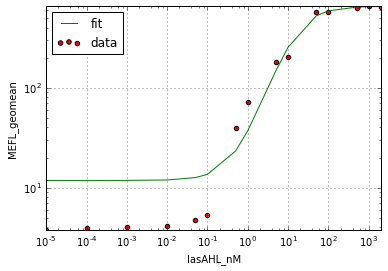

basal_expression is  11.7984876882 with a standard deviation of  10.2916736443
maximal_expression is  651.435145115 with a standard deviation of  17.4709129759
EC50 is  24.2779947108 with a standard deviation of  9.50487336346
n is  1.17188136936 with a standard deviation of  0.149906194786


In [6]:
'''Return the fitted paramaters and their covariance for the fitted curve'''
init_guess = [10, 10, 10, 2]
low_bounds = [0, 0, 0, 0]
up_bounds = [100000, 100000, 100000, 10]
fit_params, covar_params = curve_fit(equation_to_fit, MyData.lasAHL_nM, MyData.MEFL_geomean, p0 = init_guess, bounds=(low_bounds, up_bounds)) 
std_dev_error_of_fit_params = np.sqrt(np.diag(covar_params))

plt.scatter(MyData.lasAHL_nM, MyData.MEFL_geomean, c='r', label='data')
plt.plot(MyData.lasAHL_nM, equation_to_fit(MyData.lasAHL_nM, *fit_params), c='g', label='fit')

plt.xlabel('lasAHL_nM')
plt.ylabel('MEFL_geomean')
plt.legend(loc = 'best')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlim([min(MyData.lasAHL_nM)-10,max(MyData.lasAHL_nM)+10])
plt.ylim([min(MyData.MEFL_geomean),max(MyData.MEFL_geomean)])
plt.show()

report_paramaters(list_of_params_to_fit, fit_params, std_dev_error_of_fit_params)